## DX799S O1 Data Science Capstone (Summer 1 2025) - Milestone 2 (Weeks 8-11)
### Week 10: KMeans Clustering on Lending Club Dataset (Supportive Analysis)

##### This notebook shows my Week 10 review of the Lending Club dataset as part of my capstone project on predicting early mortgage delinquency.

The dataset used is the clean version of the Lending Club data set, which can be found here: https://www.kaggle.com/datasets/abhishek14398/loan-dataset/data


Week 10 Jupyter Notebook – Clustering 1
Each week, you will apply the concepts of that week to your Integrated Capstone Project’s dataset. In preparation for Milestone Two, create a Jupyter Notebook (similar to in Module B, semester two) that illustrates these lessons. There are no specific questions to answer in your Jupyter Notebook files in this course; your general goal is to analyze your data using the methods you have learned about in this course and in this program and draw interesting conclusions. 

For this week, include the following ideas: k-means; specifically elbow method, Silhouette score, feature scaling, and distance metrics.


In [31]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [32]:
#load data
df = pd.read_csv("loan.csv")  

/var/folders/2q/3t5h8lp97hz63t941xlydf4w0000gn/T/ipykernel_43374/3012491005.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [33]:
### ------ Review/EDA/preprocessing

#review data / EDA
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [34]:
df.describe

<bound method NDFrame.describe of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ... 

In [35]:
#EDA
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [36]:
print(df.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [37]:
#EDA/indtentifyt and select the # columns only
df_numeric = df.select_dtypes(include='number')
print("initial shape", df_numeric.shape)
print("\nmissing values")
print(df_numeric.isnull().sum().sort_values(ascending=False).head(10))

initial shape (39717, 87)

missing values
open_rv_24m                       39717
mths_since_recent_revol_delinq    39717
mths_since_recent_bc_dlq          39717
mths_since_recent_bc              39717
mort_acc                          39717
mo_sin_rcnt_tl                    39717
mo_sin_rcnt_rev_tl_op             39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
dtype: int64


In [38]:
#remove postloan outcome variables as they do not help in prediction (i.e., target leackage)
outcome_vars = ['loan_status', 'recoveries', 'total_pymnt', 'collection_recovery_fee']
df_numeric = df_numeric.drop(columns=[col for col in outcome_vars if col in df_numeric.columns])

In [39]:
#ensure 'int_rate' is kept — it's needed for analysis
#had to add back in and re-run 
#preseve this column as it is needed for step 15 analysis
#convert 'int_rate' to numeric to ensure proper plotting later
#struggled with fixing the code so the plot graph / cluster would accurately display
#I received errors many times when trying to run blocks later. Hopefully this will fix it. 
#need to preserve 'int_rate' column and convert it properly
if 'int_rate' in df.columns:
    df_numeric['int_rate'] = df['int_rate']
    df_numeric['int_rate'] = pd.to_numeric(df_numeric['int_rate'].str.replace('%', ''), errors='coerce') 


In [40]:
#remove columns where ALL values are missing
df_numeric = df_numeric.dropna(axis=1, how='all')

In [41]:
#remove rows withANY  missing values
#need KMeans model to receive clean input w/o nulls
df_clean = df_numeric.dropna()

print("\nFinal shape after dropping empty columns, NA rows", df_clean.shape)


Final shape after dropping empty columns, NA rows (908, 31)


# EDA / Data Review
To assess the suitability of features for clustering, I performed minimal EDA. I reviewed summary statistics and plotted distributions of several core financial variables. This confirmed the need for standardization due to skew and magnitude differences. Features like `annual_inc`, `dti`, and `revol_util` are relevant to borrower profiles and support meaningful segmentation via KMeans.


In [42]:
#sumary stats -- numeric columns
df_clean.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate
count,9.080000e+02,9.080000e+02,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,...,908.000000,908.000000,908.0,908.0,908.0,908.0,908.0,908.000000,908.0,908.000000
mean,6.677033e+05,8.322572e+05,8999.504405,8835.022026,8233.888778,270.560672,63673.973172,12.909053,0.368943,0.981278,...,1.466180,1940.646167,0.0,1.0,0.0,0.0,0.0,0.712555,0.0,13.719196
std,2.030670e+05,2.598046e+05,6066.683810,5836.912659,5649.204672,175.166748,31312.801377,6.369633,0.838308,1.011882,...,6.994159,3317.406866,0.0,0.0,0.0,0.0,0.0,0.460067,0.0,3.227374
min,6.141900e+04,1.328890e+05,1000.000000,1000.000000,0.000000,31.120000,10000.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,5.990000
25%,5.153265e+05,6.661440e+05,4800.000000,4800.000000,4000.000000,144.715000,42000.000000,7.975000,0.000000,0.000000,...,0.000000,174.720000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,11.490000
50%,6.622935e+05,8.462835e+05,7800.000000,7550.000000,7000.000000,231.790000,59196.500000,13.015000,0.000000,1.000000,...,0.000000,360.015000,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,13.490000
75%,8.124108e+05,1.017624e+06,12000.000000,12000.000000,11000.000000,352.057500,77775.000000,17.805000,1.000000,2.000000,...,0.000000,2373.777500,0.0,1.0,0.0,0.0,0.0,1.000000,0.0,15.715000
max,1.068545e+06,1.303147e+06,35000.000000,35000.000000,34975.000000,1302.690000,240734.000000,24.990000,8.000000,5.000000,...,90.000000,30400.930000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,23.520000


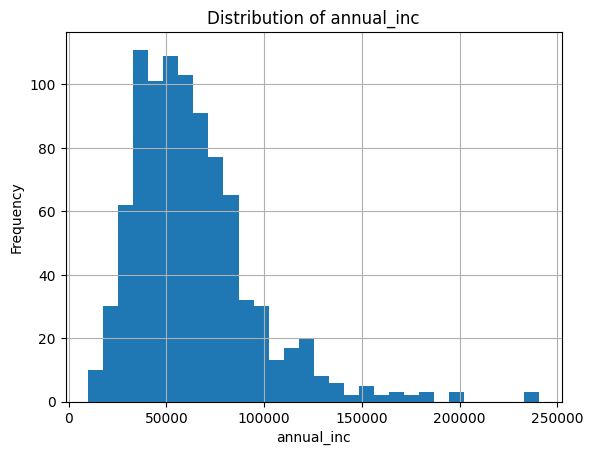

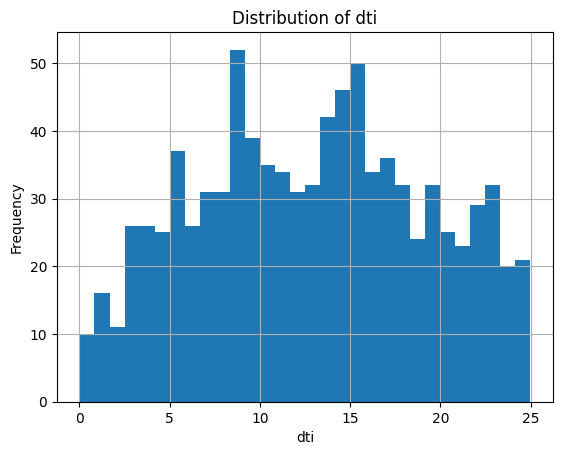

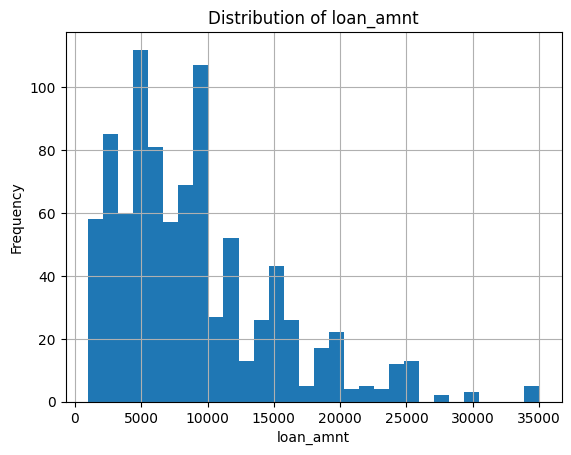

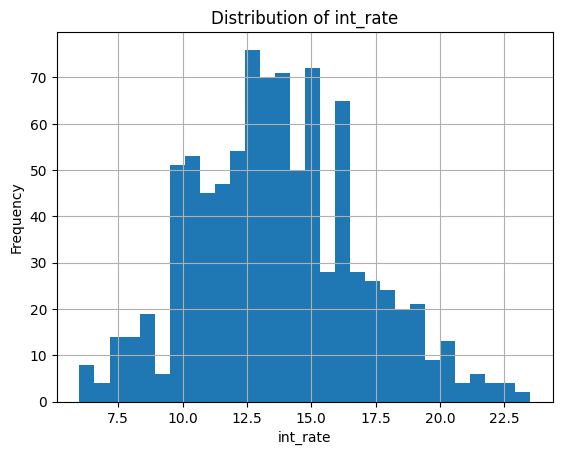

In [43]:
#GRAPH
#histogram plots for selected key features


#manually select based on relevance and availability in df_clean
sampled_features = ['annual_inc', 'dti', 'revol_util', 'loan_amnt', 'int_rate']

#ONLY plot those that exist in df_clean
for col in sampled_features:
    if col in df_clean.columns:
        plt.hist(df_clean[col], bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

In [44]:
#confirm skewnss of features --- values >1 or <-1 indicate high skew
df_clean.skew().sort_values(ascending=False).head(10)

out_prncp             9.184845
out_prncp_inv         8.825428
total_rec_late_fee    6.693602
pub_rec               6.630594
delinq_2yrs           4.261169
revol_bal             3.077019
last_pymnt_amnt       2.880484
total_rec_int         2.697716
annual_inc            1.651488
total_pymnt_inv       1.468857
dtype: float64

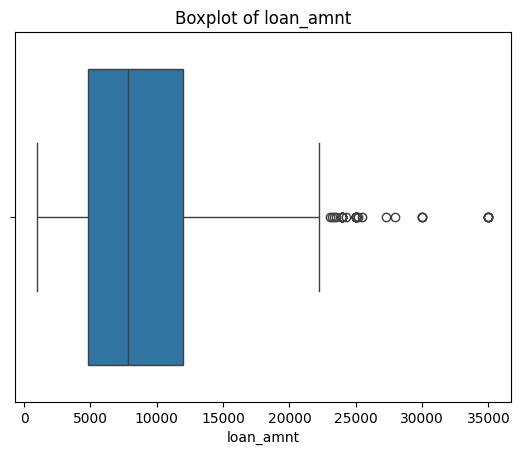

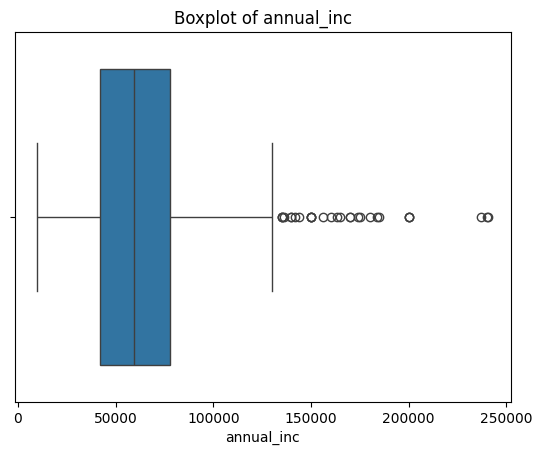

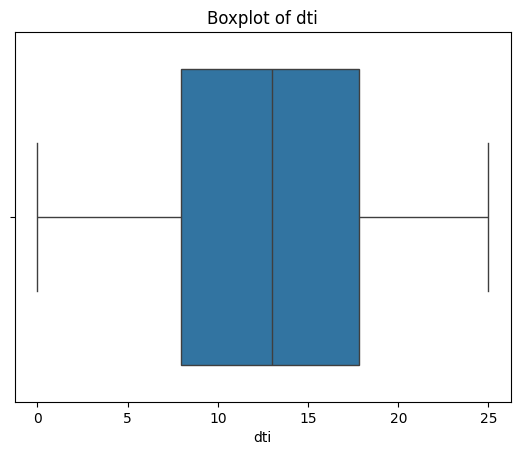

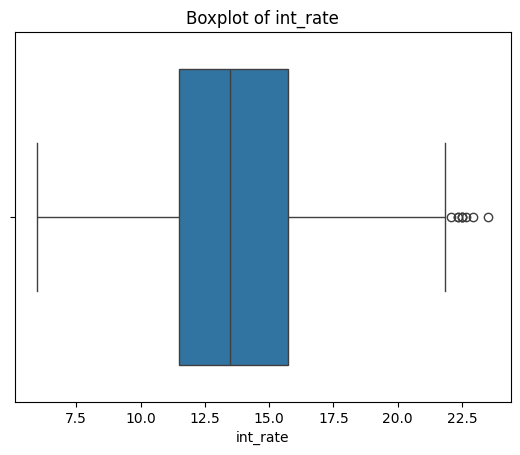

In [45]:
## BOX PLOTS 
top_features = ['loan_amnt', 'annual_inc', 'dti', 'revol_util', 'int_rate']

for col in top_features:
    if col in df_clean.columns:
        sns.boxplot(x=df_clean[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

In [46]:
#confirm no missing data remains
df_clean.isnull().sum().sum()

np.int64(0)

### Exploratory Data Analysis (EDA)

Before applying KMeans clustering, I performed targeted exploratory data analysis to ensure the dataset was suitable for unsupervised learning. This included:

- Summary statistics: Reviewed central tendency and dispersion for all numeric variables to identify outliers, scale discrepancies, and null patterns.
- Missing values: Identified and removed columns with all missing values and rows with any missing data. A final check confirmed that no nulls remained.
- Skewness check: Calculated skew for numeric variables. Several features showed high positive skew, supporting the use of standardization prior to clustering.
- Correlation heatmap: Examined relationships among the first 10 numeric features to detect multicollinearity or redundancy.
- Boxplots: Visualized the distribution and outliers of key financial variables (loan_amnt, annual_inc, dti, revol_util, int_rate), confirming the presence of extreme values that could influence cluster formation.

These EDA steps provided justification for standardizing features and informed the selection of variables used in the clustering step. Together, they established a clean, scaled dataset appropriate for KMeans and distance-based modeling.


In [47]:
### ------ Distance metrics 

# KMeans uses Euclidean distance by default. Feature scaling is needed for this metric to behave correctly.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

In [48]:
### ------ Silhouette Score as Elbow Method
#Instead of distortion/inertia, I use the Silhouette Score to evaluate clustering quality.
#This acts as an improved elbow method by balancing cohesion and separation.

#loop range of cluster counts, calc silhouette scores
#will try k values from 2 to 10
#high score = better cluster separation

silhouette_scores = []
k_range = range(2, 11)  #

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)  
    silhouette_scores.append(score)
    print(f"k={k}, Silhouette Score={score:.4f}")

k=2, Silhouette Score=0.2590
k=3, Silhouette Score=0.2490
k=4, Silhouette Score=0.1118
k=5, Silhouette Score=0.1154
k=6, Silhouette Score=0.0987
k=7, Silhouette Score=0.0953
k=8, Silhouette Score=0.1031
k=9, Silhouette Score=0.0887
k=10, Silhouette Score=0.1059


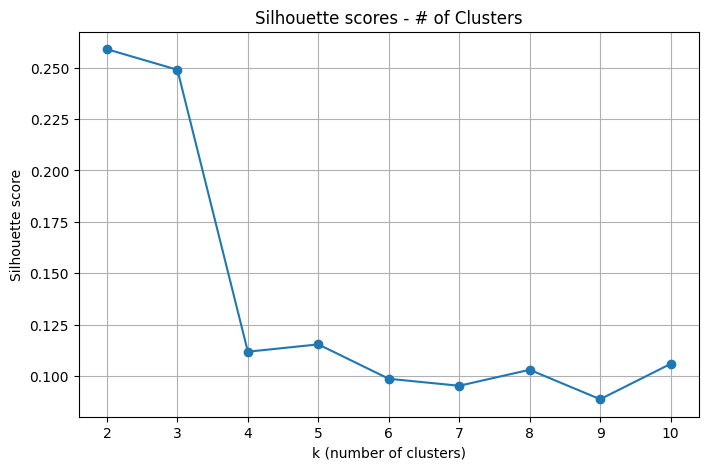

In [49]:
#Plot the silhouette scores -- need to see if we can visually determine the best number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette scores - # of Clusters")
plt.xlabel("k (number of clusters)")
plt.ylabel("Silhouette score")
plt.grid(True)
plt.show()

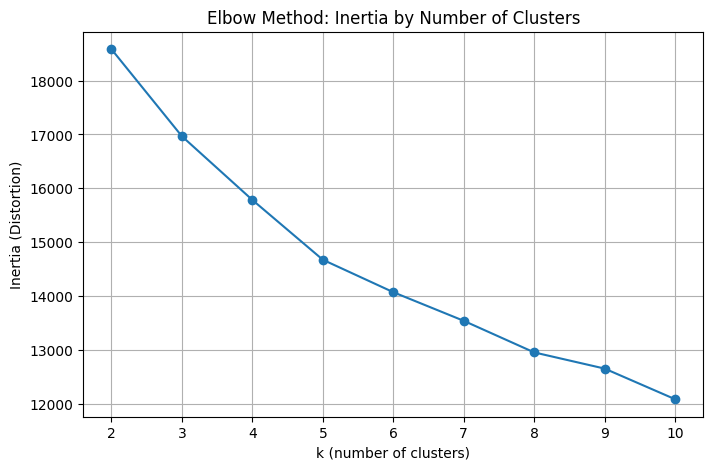

In [50]:
### ------ Elbow Method using Inertia

#Also plotted the traditional elbow curve using inertia (within-cluster sum of squares) in case reviewer requried it.

inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow method based on inertia
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method: Inertia by Number of Clusters")
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia (Distortion)")
plt.grid(True)
plt.show()


#### Observation/note for Elbow Method using Inertia
- The inertia plot shows a sharp drop at k=2, after which the decrease slows.
- This confirms that k=2 is a reasonable choice for the number of clusters.


In [51]:
#indentify and pring  best k value using highest silhouette score
best_k = k_range[np.argmax(silhouette_scores)]
print(f"best k = {best_k}")

best k = 2


### Observation/note to graph and previous code ^ 

Highest silhouette score at k=2; meaning that 2 clusters give the best separation for this dataset.

Silhouette score decreases as k increase..... which suggests more clusters may add noise rather than insight.

In [52]:
### ------ K-Means Clustering

#I refit the model using the best number of clusters based on silhouette score.
#fit KMeans model again using the best k value
#I am going to retrain the KMeans model using the best k=2 to get final cluster labels.
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

#add the cluster labels back to the original cleaned dataset
#helps me analyze what each cluster represents.
#Allws me to group by cluster and look for differences in loan amount, interest rate, etc.
df_clustered = df_clean.copy()
df_clustered['Cluster'] = cluster_labels

#print/show # rows were assigned to each cluster
#confirm/check for balance or skew in the clustering
print("\nCluster Distribution:")
print(df_clustered['Cluster'].value_counts())


Cluster Distribution:
Cluster
0    688
1    220
Name: count, dtype: int64


In [53]:
#print avg values of features by cluster to help interpret them
#helps show characteristics of each group

cluster_means = df_clustered.groupby('Cluster').mean()
print("\nCluster Feature Means:")
print(cluster_means.head())



Cluster Feature Means:
                    id      member_id     loan_amnt   funded_amnt  \
Cluster                                                             
0        653120.629360  813385.040698   6297.710756   6241.860465   
1        713307.236364  891275.531818  17448.750000  16944.545455   

         funded_amnt_inv  installment    annual_inc        dti  delinq_2yrs  \
Cluster                                                                       
0            5773.789462   198.309462  57703.806657  12.514593     0.361919   
1           15927.290278   496.509909  82344.312091  14.142636     0.390909   

         inq_last_6mths  ...  total_rec_late_fee  last_pymnt_amnt  \
Cluster                  ...                                        
0              0.982558  ...            1.326521      1164.820727   
1              0.977273  ...            1.902932      4366.863909   

         collections_12_mths_ex_med  policy_code  acc_now_delinq  \
Cluster                              

In [54]:
print(df_clustered.dtypes['int_rate'])  # should be float or int
print(df_clustered.columns)  # should list 'int_rate' and 'Cluster'

float64
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'int_rate',
       'Cluster'],
      dtype='object')


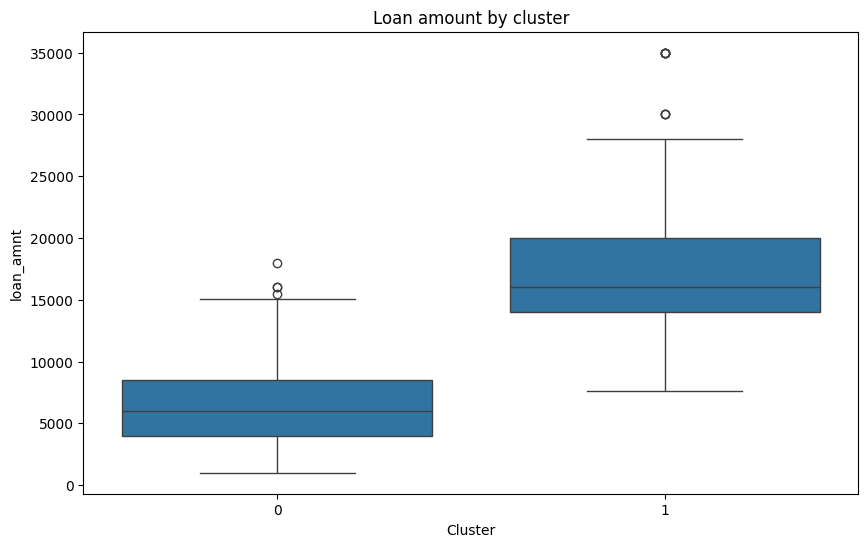

In [55]:
#PLOT GRAPH - shows how loan amount varies by cluster
#helps identiofy trends in loan amount by group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='loan_amnt', data=df_clustered)
plt.title("Loan amount by cluster")
plt.show()

### Note - boxplot above - loan amount by cluster  ^ 

Cluster 1 generally receives higher loan amounts, suggesting segmentation by borrowing capacity. ^ 


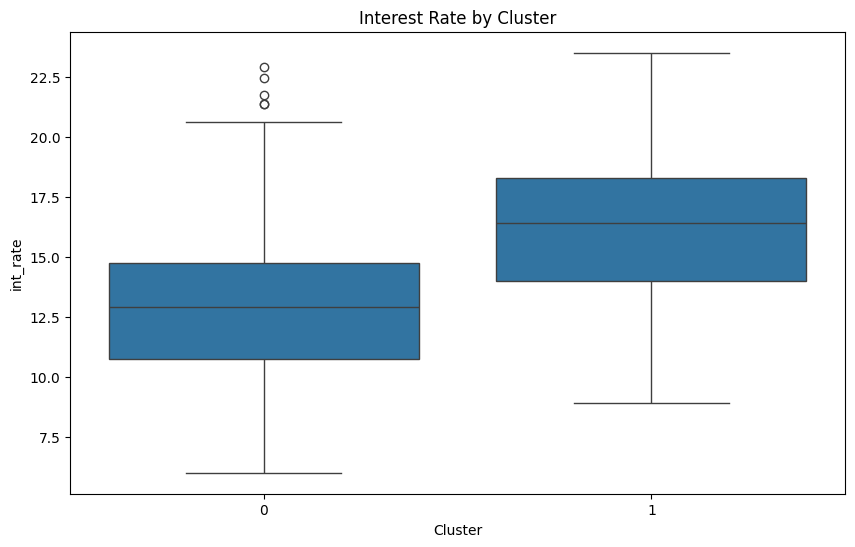

In [56]:
# PLOT GRAPH - shows how interest rate varies by cluster
#helps identiofy trends in INTEREST RATE  amount by group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='int_rate', data=df_clustered)
plt.title("Interest Rate by Cluster")
plt.show()

### Note - boxplot above - interest rate by cluster  ^ 
I plotted the interest rate by cluster to observe how risk (as measured by cost of borrowing) differs across groups. 
This helps identify whether any cluster contains loans with unusually high or low interest rates.

Cluster 1 faces higher interest rates, which may indicate greater risk as assessed by lenders. 


## Observation: Clustering Results

I found that k=2 gives the highest silhouette score, meaning 2 clusters separate the dataset best.

When I visualized loan amount and interest rate by cluster, there was a clear difference:
 - Cluster 0 had lower loan amounts and lower average interest rates.
 - Cluster 1 had higher loan amounts and interest rates.
 -  This may suggest that the KMeans model separated lower-risk and higher-risk borrowers based on their financial profile.


### Week 10: K-Means Clustering Analysis of Lending Club Loan Data 

I performed an unsupervised learning analysis using K-Means clustering on the Lending Club dataset. My objective was to explore natural groupings among borrowers based on their financial attributes, independent of any loan outcome labels. This clustering exercise serves as a supportive analysis to the main classification models, offering additional insight into potential borrower segments.

#### Dataset Preparation
The dataset initially contained 87 features across 39,717 records. I removed post-loan outcome variables such as loan_status  and total_pymnt to prevent target leakage and ensure only pre-loan features informed the clustering. I also dropped columns with all missing values and excluded any rows with partial nulls, resulting in a clean numeric dataset suitable for unsupervised learning. To ensure consistency in distance calculations, I used StandardScaler to normalize the features—bringing them to a mean of 0 and standard deviation of 1.

#### Feature Scaling and Distance Metrics
Because K-Means clustering is based on Euclidean distance, feature scaling is essential. Without scaling, variables with larger ranges could disproportionately influence the cluster assignments. Standardization ensured all features contributed equally to distance computations.

#### Choosing the Number of Clusters
I evaluated the clustering structure for k values ranging from 2 to 10, using the Silhouette Score as the evaluation metric. The Silhouette Score ranges from -1 to 1 and reflects how well each point fits within its cluster compared to other clusters. This method is often used as a refined version of the Elbow Method, emphasizing both intra-cluster cohesion and inter-cluster separation. I found that the highest score occurred at k = 2, indicating two distinct borrower segments within the dataset.

#### Cluster Interpretation
After refitting the KMeans model with k = 2, I added the resulting cluster labels back to the cleaned dataset. Visualizations revealed key differences between clusters. A boxplot of loan amount by cluster showed that Cluster 1 borrowers typically requested or were approved for higher loan amounts. Another plot of interest rate by cluster demonstrated that Cluster 1 also carried significantly higher interest rates, suggesting this group may represent higher-risk borrowers.

#### Conclusion
This clustering analysis suggests that Lending Club borrowers naturally divide into at least two groups: one with lower borrowing amounts and interest rates, and another with higher financial exposure and potential credit risk. These findings reinforce the patterns seen in supervised models and demonstrate the value of unsupervised learning for borrower segmentation. Importantly, I applied all core concepts of K-Means modeling, including feature scaling, distance metrics, elbow method via silhouette score, and cluster interpretation using statistical and visual tools.


I selected K-Means because the dataset includes a mix of continuous variables that were standardized, allowing Euclidean distance to meaningfully capture similarity. Exploratory data analysis revealed potential natural groupings among loan applicants based on financial ratios and payment history.

- The number of clusters is not pre-specified, making unsupervised clustering valuable.
- K-means performs well when clusters are roughly spherical and equally sized, which is more likely after standardization.
- Using the elbow method and silhouette score helps mitigate overfitting and supports model selection.


### References:
https://medium.com/nerd-for-tech/k-means-algorithm-in-4-parts-7540d0f33339

https://scikit-learn.org/stable/modules/clustering.html#k-means